# Data Visualization With Python, Matplotlib and Seaborn
![](images/pexels.jpg)
<figcaption style="text-align: center;">
    <strong>
        Photo by 
        <a href='https://www.pexels.com/@darshan394?utm_content=attributionCopyText&utm_medium=referral&utm_source=pexels'>Deva Darshan</a>
        on 
        <a href='https://www.pexels.com/photo/silhouette-of-house-and-trees-by-water-during-golden-hour-1044330/?utm_content=attributionCopyText&utm_medium=referral&utm_source=pexels'>Pexels</a> All images are by the author unless specified otherwise.
    </strong>
</figcaption>

In [16]:
import warnings

warnings.filterwarnings("ignore")

# Introduction

# Setting up the libraries and load the data

We will start by installing the libraries and importing the data we will be using. Running the below command will install three most-commonly used libraries during any data exploration project:

```python
pip install pandas matplotlib seaborn
```

If you are not already familiar:
1. Pandas is a powerful library to manipulate and analyze tabular data
2. Matplotlib is the king of Python data visualization libraries that makes it a breeze to visually explore tabular data
3. Seaborn is another Python data viz library built on top of Matplotlib, introducing some features that weren't previously available in Matplotlib. 

In this tutorial, we will use the three libraries extensively. If you are already wondering why we need two visualization libraries, we will talk more about it towards the end.

For now, let's import the libraries under their standard aliases:

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Next, we load in the data that we will be analyzing. The dataset contains physical measurements of almost 54000 diamonds, including their prices. You can download the original dataset as a CSV file from [here on Kaggle](https://www.kaggle.com/shivam2503/diamonds), but we will be using a shortcut:

In [3]:
diamonds = sns.load_dataset("diamonds")

Since the dataset is already built into Seaborn, we can load it as a [Pandas DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) using the `load_dataset` function.

In [66]:
type(diamonds)

pandas.core.frame.DataFrame

# Initial exploration

Before we dive head-first into visuals, it is a good idea to take your time and get the feel of your dataset. More specifically, we want to take a high-level overview of the dataset, noting its variables and their shape.

In [4]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Here, we have used the handy `head` function of Pandas that prints out the first five rows of the dataframe. This should be the first function you use when you load a dataset into your environment for the first time. 

We see that the dataset has 10 variables or features - 3 categorical and 7 numeric. Let me briefly explain what each variable represents:
- **carat** - weight of a diamond
- **cut** - the cut quality with 5 possible values in increasing order: Fair, Good, Very Good, Premium, Ideal
- **color** - the color of a diamond with color codes from D (the best) to J (the worst)
- **clarity** - the clarity of a diamond with 8 clarity codes
- **x** - length of a diamond (mm)
- **y** - height of a diamond (mm)
- **z** - depth of a diamond (mm)
- **depth** - total depth percentage calculated as `z / average(x, y)`
- **table** - ratio of a diamonds height to its widest point
- **price** - diamond price in dollars

Instead of counting all variables one-by-one, we could have used the `shape` attribute of the dataframe:

In [5]:
diamonds.shape

(53940, 10)

As we see, there are 53,940 diamonds recorded, along with their 10 different features. Now, let's print a 5-number summary of the dataset:

In [6]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


The `describe` function displays some important metrics of each *numeric* variable in a dataframe. Here are some observations from the above output:
- the cheapest diamond in the dataset costs 326 dollars while the most expensive costs almost 60 times more - 18823 dollars.
- the minimum weight of a diamond is 0.2 carats while the max is 5.01. The average weight is ~0.8. 
- Looking at the mean of x and y features, we see that diamonds, on average, have the same height and width.

Now that we are comfortable with the features in our dataset, we can start plotting them to uncover more insights. 

# Univariate analysis

What we did in a previous section was the start of something called "Exploratory Data Analysis" (EDA), which is the basis for any data-related project.

The goal of EDA is simple - get to know your dataset at the deepest level possible. Becoming intimate with the data, learning its intricacies and relationships between its variables is an absolute must. Doing a successful and thorough EDA lays the groundwork for future stages of your data project, which is usually using machine learning algorithms to model the behavior of the data.

We have already performed the first stage of EDA, which was a simple "get acquainted" step. Now, we go deep, starting with univariate analysis.

As the name suggests, in this stage, we explore variables one at a time, we don't care about the relationships between them just yet. Before we start plotting, we take a small sample of the dataset because 54000 is more than what we need and we can learn about the datasets pretty well with just 3000. Besides, smaller subset of diamonds prevents overplotting.

In [39]:
sample = diamonds.sample(3000)

To take a sample of the dataset, we use the `sample` function of pandas, passing in the number of random datapoints to include in a sample.

Now, we create our first plot, which is a histogram:

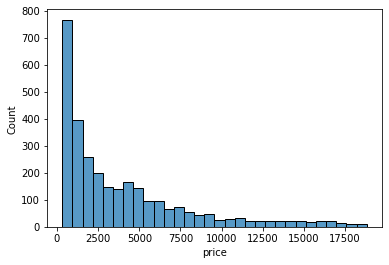

In [70]:
sns.histplot(x=sample["price"]);

Histograms only work on numeric variables. They divide the data into an arbitrary number of equal sized bins and displays how many diamonds go into each bin. So, interpreting the above histogram, we can approximate that there are about 800 diamonds which are priced between 0 and 1000 (looking at the first bin or bar). 

Here, each bin contains the count of diamonds, which might not be what we want. For example, instead of seeing counts of diamond in each bin, we might want to see what percentage of the diamonds falls into bin. For that, we will set the `stat` argument of the `histplot` function to `percent`:

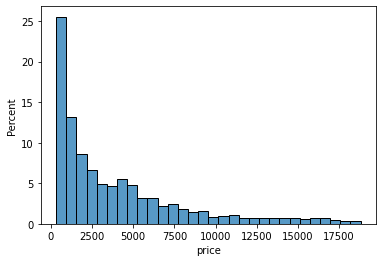

In [72]:
sns.histplot(sample["price"], stat="percent");

Now, the height of each bar/bin shows the percentage of the diamonds. Let's do the same for the carat of the diamonds:

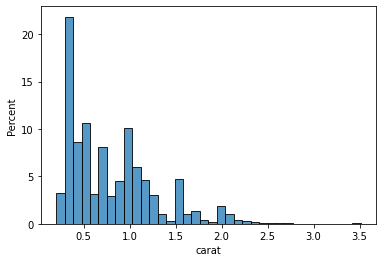

In [74]:
sns.histplot(sample["carat"], stat="percent");

Looking at the first few bars, we can conclude that the majority of the diamonds weight less than 0.5 carats. The aim of histograms is to take a numeric variable and show what it generally looks like. The statisticians call it looking at the *distribution* of a variable.

However, histograms aren't the only plots that does the job. There is also a plot called KDE Plot (Kernel Density Estimate), which uses some fancy math under the hood to draw curves like this:

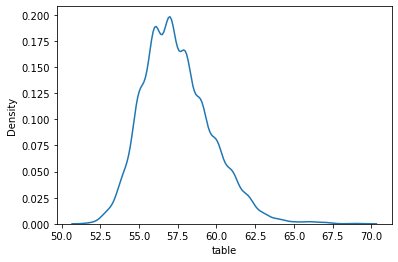

In [33]:
sns.kdeplot(sample["table"]);

Plotting the KDE plot of the table variable shows us that the majority of diamonds measure between 55.0 and 60.0. At this point, I will leave it to you to plot the KDEs and histograms of other numeric variables because we have to move on to categorical features.

The most common plot for categorical features is a `countplot`. Passing the name of a categorical feature in our dataset to Seaborn's `countplot` draws a bar chart with each bar height representing the number of diamonds in each category. Below is a countplot of diamond cuts:

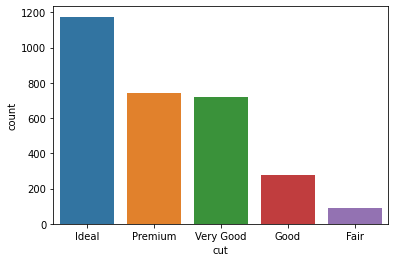

In [34]:
sns.countplot(sample["cut"]);

We can see that our dataset is made up of much more ideal diamonds than premium or very good diamonds. Here is a countplot of diamond colors for the interested:

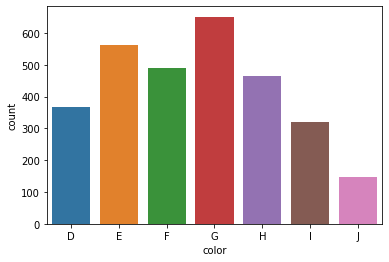

In [75]:
sns.countplot(sample["color"]);

This concludes our univarite analysis section of the EDA.

# Bivariate analysis

Now, things will be more interesting because we will look at the relationships between two variables at a time. Let's start by looking at the connection between diamond carats and price. From our own lives, we know that diamonds with higher carats cost more. Let's see if we can visually capture this trend:

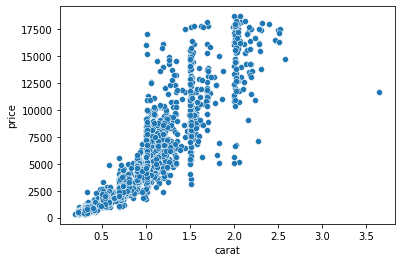

In [35]:
sns.scatterplot(x=sample["carat"], y=sample["price"]);

Here, we are using another Seaborn function which plots a scatterplot. Scatterplots are one of the most widely-used charts because they show the relationships between two variables very accurately by using a cloud of dots. 

Above, each dot represents a single diamond and their position is determined by their carat and price measurements, which we passed to `x` and `y` parameters of the `scatterplot` function. And the plot confirms our assumptions - heavier diamonds do tend to be more expensive. We are drawing this conclusion based on the curvy upward trend of the dots. 

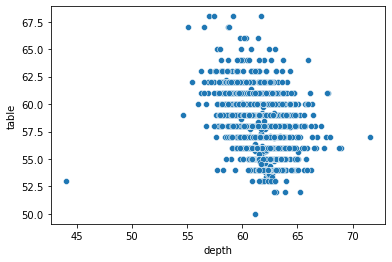

In [77]:
sns.scatterplot(x=sample["depth"], y=sample["table"]);

Now, we are plotting depth against table. Frankly, this scatterplot is a bit disappointing because we can't draw a tangible conclusion like we did with the previous one. Well, what can we say? You gotta work with what you have. Let's move on.


Another common bivariate plot is a boxplot and we will see why it is named so in a minute. Boxplots plot the distribution of a variable against another based on their 5 number summary:

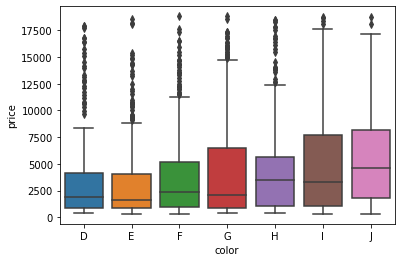

In [41]:
sns.boxplot(x=sample["color"], y=sample["price"]);

The boxplot above shows the relationship between each color category and their respective prices. The horizontal vertices at the bottom and top of each vertical line of a box represents the minimum and maximum values that category. The edges of the boxes, specifically, the bottom and top edges represent the 25th and 75th percentiles. 

In other words, the bottom edge of the *first* box tells us that 25% of D colored diamonds cost less than about 1250 dollars while the top edge says that 75% of diamonds cost less than about 4500 dollars. The little horizontal line in the middle denotes the median - the 50% mark. 

The dark dots above the top line are called outliers. These are the datapoints which are considered unusual or far from the rest of the observations. We won't go into the detail of how they are calculated exactly, but you can read more about them [here](https://en.wikipedia.org/wiki/Outlier#:~:text=In%20statistics%2C%20an%20outlier%20is,serious%20problems%20in%20statistical%20analyses.). 

Let's plot a boxplot of diamond clarities and their relationship with carat:

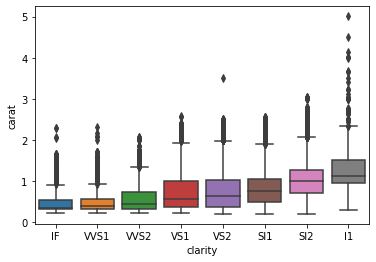

In [78]:
sns.boxplot(diamonds["clarity"], diamonds["carat"]);

Here we see an interesting trend. The diamond clarities are displayed from best to worst and we can see that lower clarity diamonds tend to weigh more in the dataset. The last box shows that the lowest clarity (l1) diamonds weigh a carat on average.

Once again, I'll leave it to you to explore other bivariate relationships in the dataset.

# Multivariate analysis

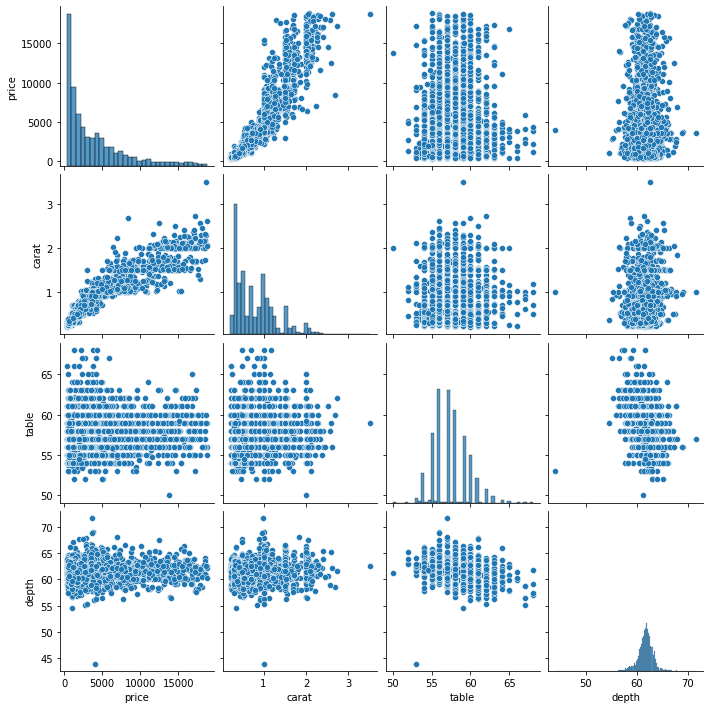

In [46]:
sns.pairplot(sample[["price", "carat", "table", "depth"]]);

In [47]:
correlation_matrix = sample.corr()

correlation_matrix.head()

,carat,depth,table,price,x,y,z
carat,1.000000,0.012913,0.177626,0.926730,0.977626,0.977053,0.780840
depth,0.012913,1.000000,-0.288904,-0.016162,-0.036521,-0.038789,0.065912
table,0.177626,-0.288904,1.000000,0.129905,0.188730,0.182571,0.106042
price,0.926730,-0.016162,0.129905,1.000000,0.889878,0.891812,0.709302
x,0.977626,-0.036521,0.188730,0.889878,1.000000,0.998976,0.793191


In [48]:
correlation_matrix.shape

(7, 7)

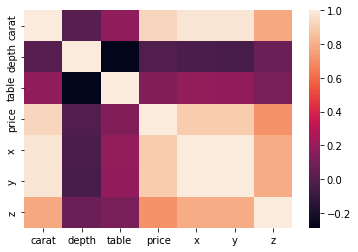

In [49]:
sns.heatmap(correlation_matrix);

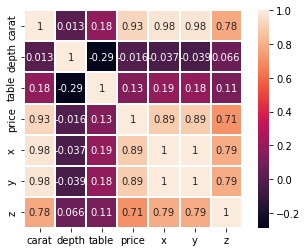

In [64]:
sns.heatmap(correlation_matrix, square=True, annot=True, linewidths=2);

# Differences between Matplotlib and Seaborn - which one to choose?

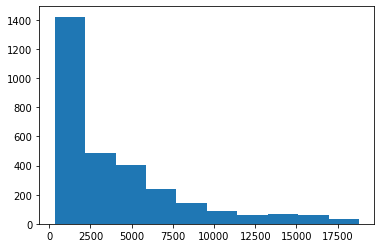

In [57]:
fig, ax = plt.subplots()

ax.hist(sample["price"]);

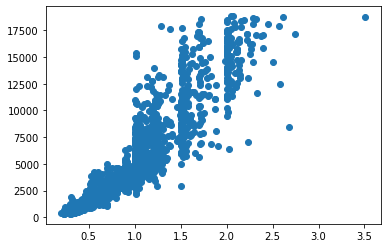

In [58]:
fig, ax = plt.subplots()

ax.scatter(sample["carat"], sample["price"]);

In [60]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

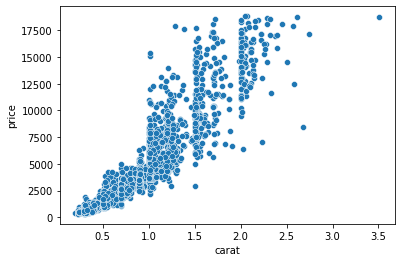

In [59]:
ax2 = sns.scatterplot(sample["carat"], sample["price"])

In [62]:
type(ax2)

matplotlib.axes._subplots.AxesSubplot

# Summary